## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
lang_df = pd.read_csv("QueryResults (1).csv", names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [10]:
lang_df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [8]:
lang_df.shape

(2370, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [17]:
#This returns the total entries in each column 
lang_df.count()

DATE     2370
TAG      2370
POSTS    2370
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [25]:
#Total number of post per language
total_number_posts = lang_df.groupby('TAG').sum()

#language with the highest number of posts
(f"The language witht the highest number of posts {total_number_posts.idxmax()['POSTS']}")

'javascript'

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [30]:
#Entries per language
entry = lang_df.groupby('TAG').count()

print(f"The number language with the fewest entries is {entry.idxmin()}")



DATE     go
POSTS    go
dtype: object

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [33]:
#To tap into the one of the date entries
lang_df.DATE[1]
#OR
lang_df['DATE'][1]

'2008-08-01 00:00:00'

In [35]:
#We have converted the date string to a Timestamp
print(pd.to_datetime(lang_df.DATE[1]))

2008-08-01 00:00:00


In [41]:
#   We need to convert the whole column of he DATE to a TIMESTAMPS
lang_df.DATE = pd.to_datetime(lang_df['DATE'])

pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [6]:
#We can use the pivot() to accomplish some manipulation
#What to understand is how to supply the correct aguments to get the desired outcome
#What happens if a value is missing .pivot() wiill insert NaN value
reshaped_df = lang_df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,8.0,83.0,505.0,164.0,14.0,NaN,222.0,164.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01 00:00:00,28.0,318.0,1646.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01 00:00:00,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01 00:00:00,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01 00:00:00,247.0,1662.0,6071.0,3388.0,126.0,737.0,7023.0,15182.0,124.0,3837.0,22220.0,4404.0,480.0,1791.0
2022-07-01 00:00:00,210.0,1497.0,5968.0,3268.0,127.0,745.0,6633.0,15211.0,130.0,3787.0,22516.0,4197.0,453.0,1756.0
2022-08-01 00:00:00,179.0,1510.0,6360.0,3254.0,133.0,861.0,6556.0,15653.0,119.0,3789.0,22019.0,4348.0,478.0,1745.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [48]:

#This shows the dimensions of the dataframe
reshaped_df.shape

(172, 14)

In [53]:
#Shows the number of coulmns the dataframe has
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [49]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,164.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1646.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,158.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [55]:
#Shows the number of entries per programming language
reshaped_df.count()
#The reason is that .count() method excludes NaN values.
#When we ivoted the dataframe the NaN values were inserted wjen there were no posts for a language in that month


TAG
assembly      171
c             171
c#            172
c++           171
delphi        171
go            156
java          171
javascript    171
perl          171
php           171
python        171
r             169
ruby          171
swift         163
dtype: int64

dealing with NaN Values 
In this case, we don't want to drop rows with that have a NaN value. instead, we want to substitute the number 0 for each NaN value in the DataFrame using the method .fillna()

In [56]:
#Without the inplace agurment we would have to write this
# reshaped_df = reshaped_df.fillna(0)

#but with it we just write
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

#Then we can check if any NaN values are left in the dataframe with this
reshaped_df.isna().values.any()
#We chain on the values attribute and the any() method so that we dont have ot search through the entire DataFrame to spot if .isna() is true

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,164.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1646.0,753.0,104.0,0.0,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1731.0,734.0,141.0,0.0,957.0,581.0,97.0,501.0,451.0,1.0,158.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: 

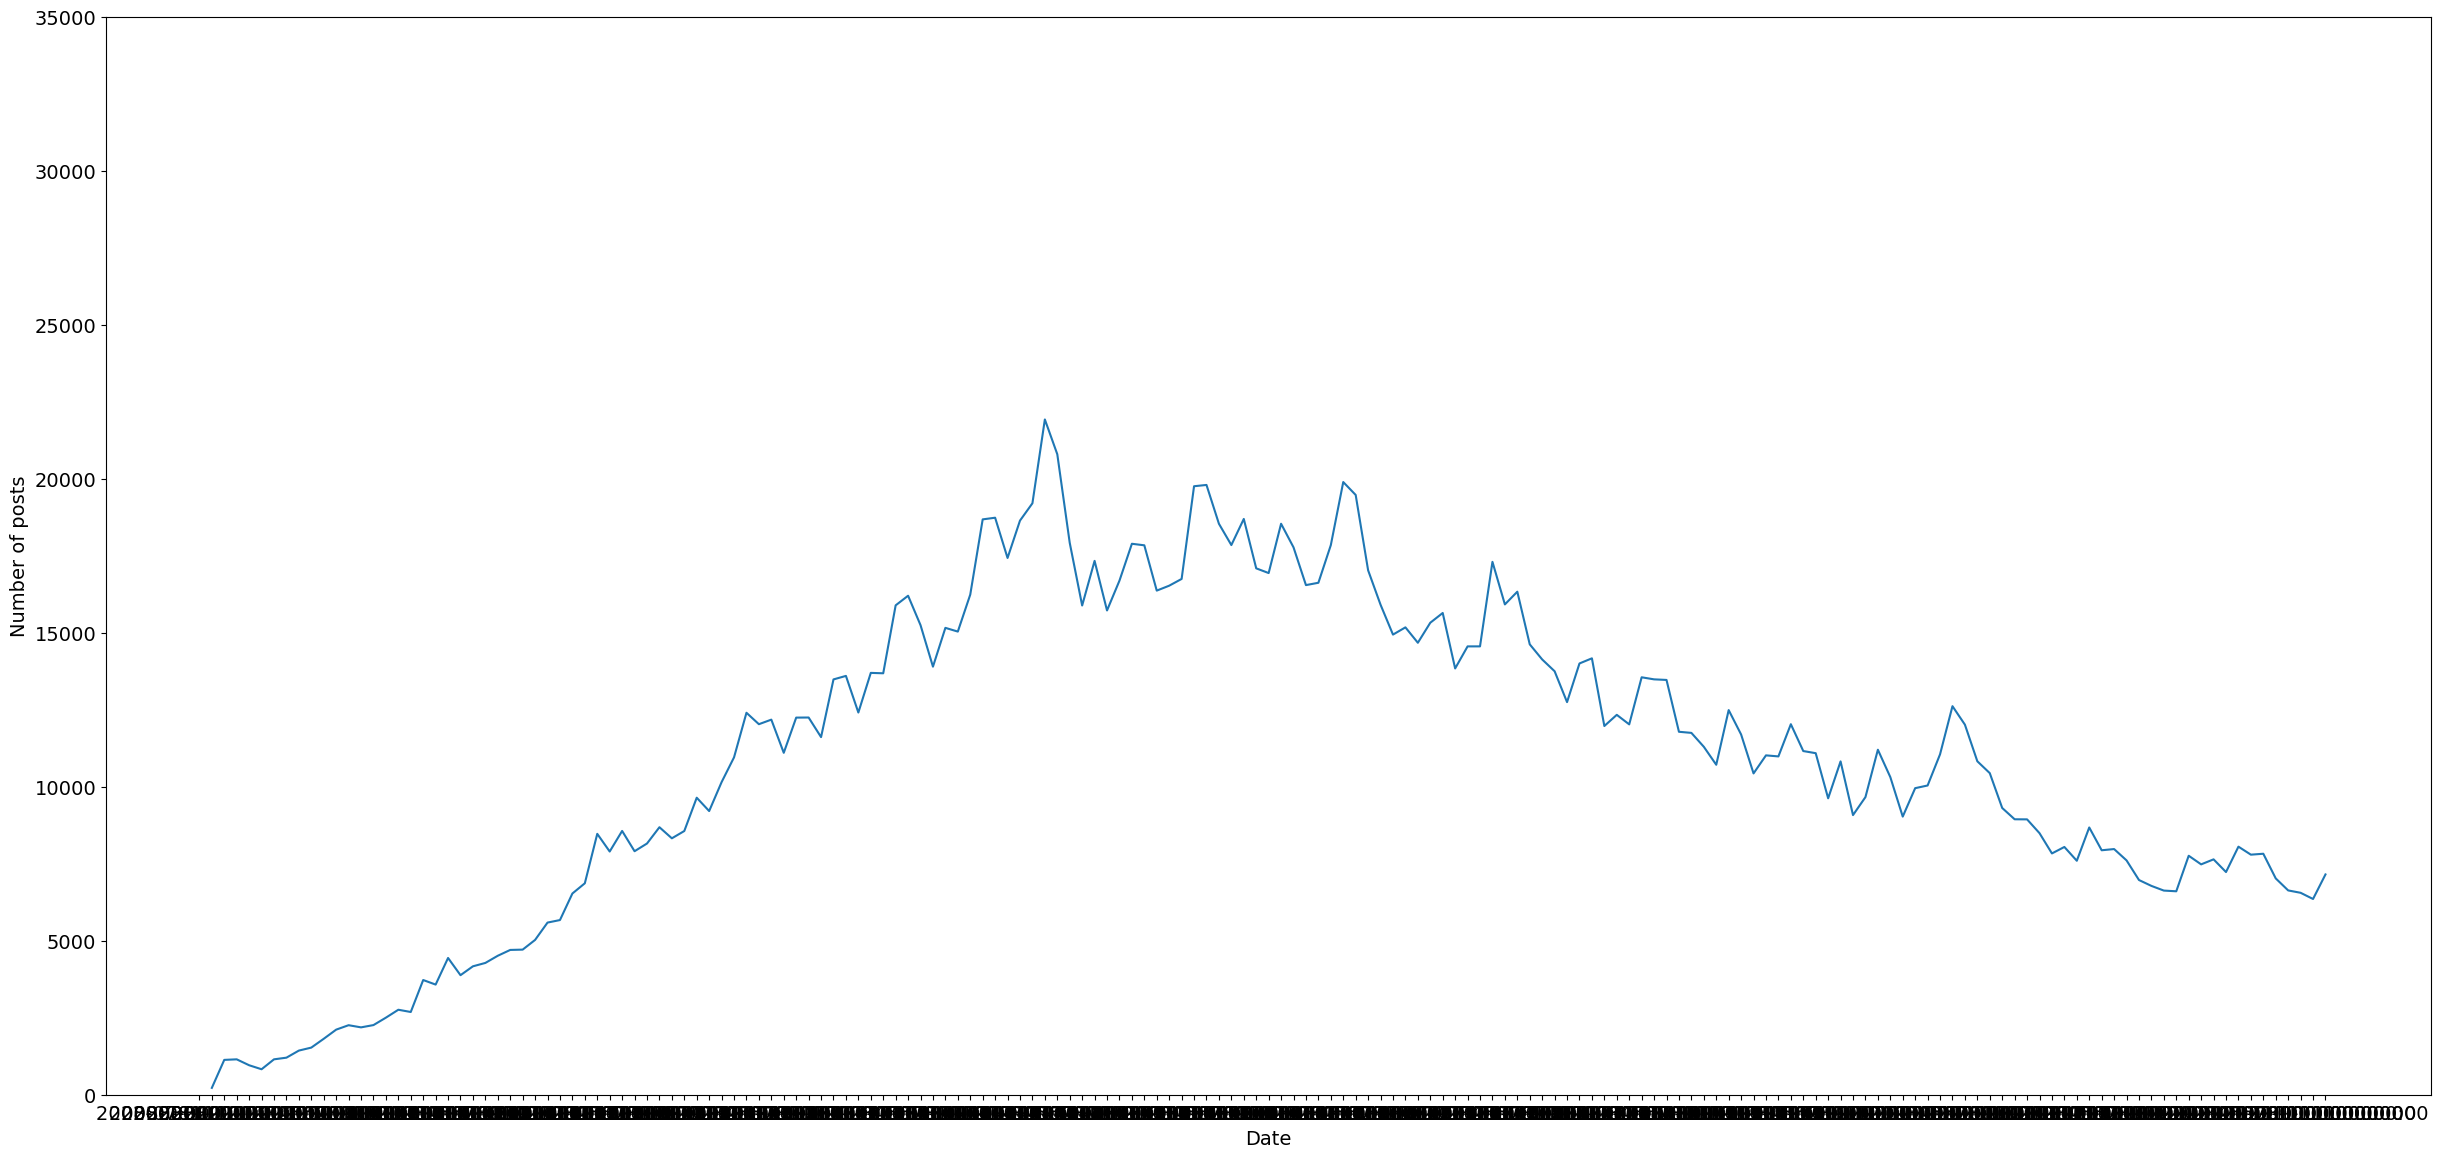

In [13]:
#The plot(x,y) visualise a line graph
plt.figure(figsize=(30,14))
#increase the font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#The axes labels are set
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
#setting limits for the axes
plt.ylim(0,35000)
#line graph for java
plt.plot(reshaped_df.index, reshaped_df.java)


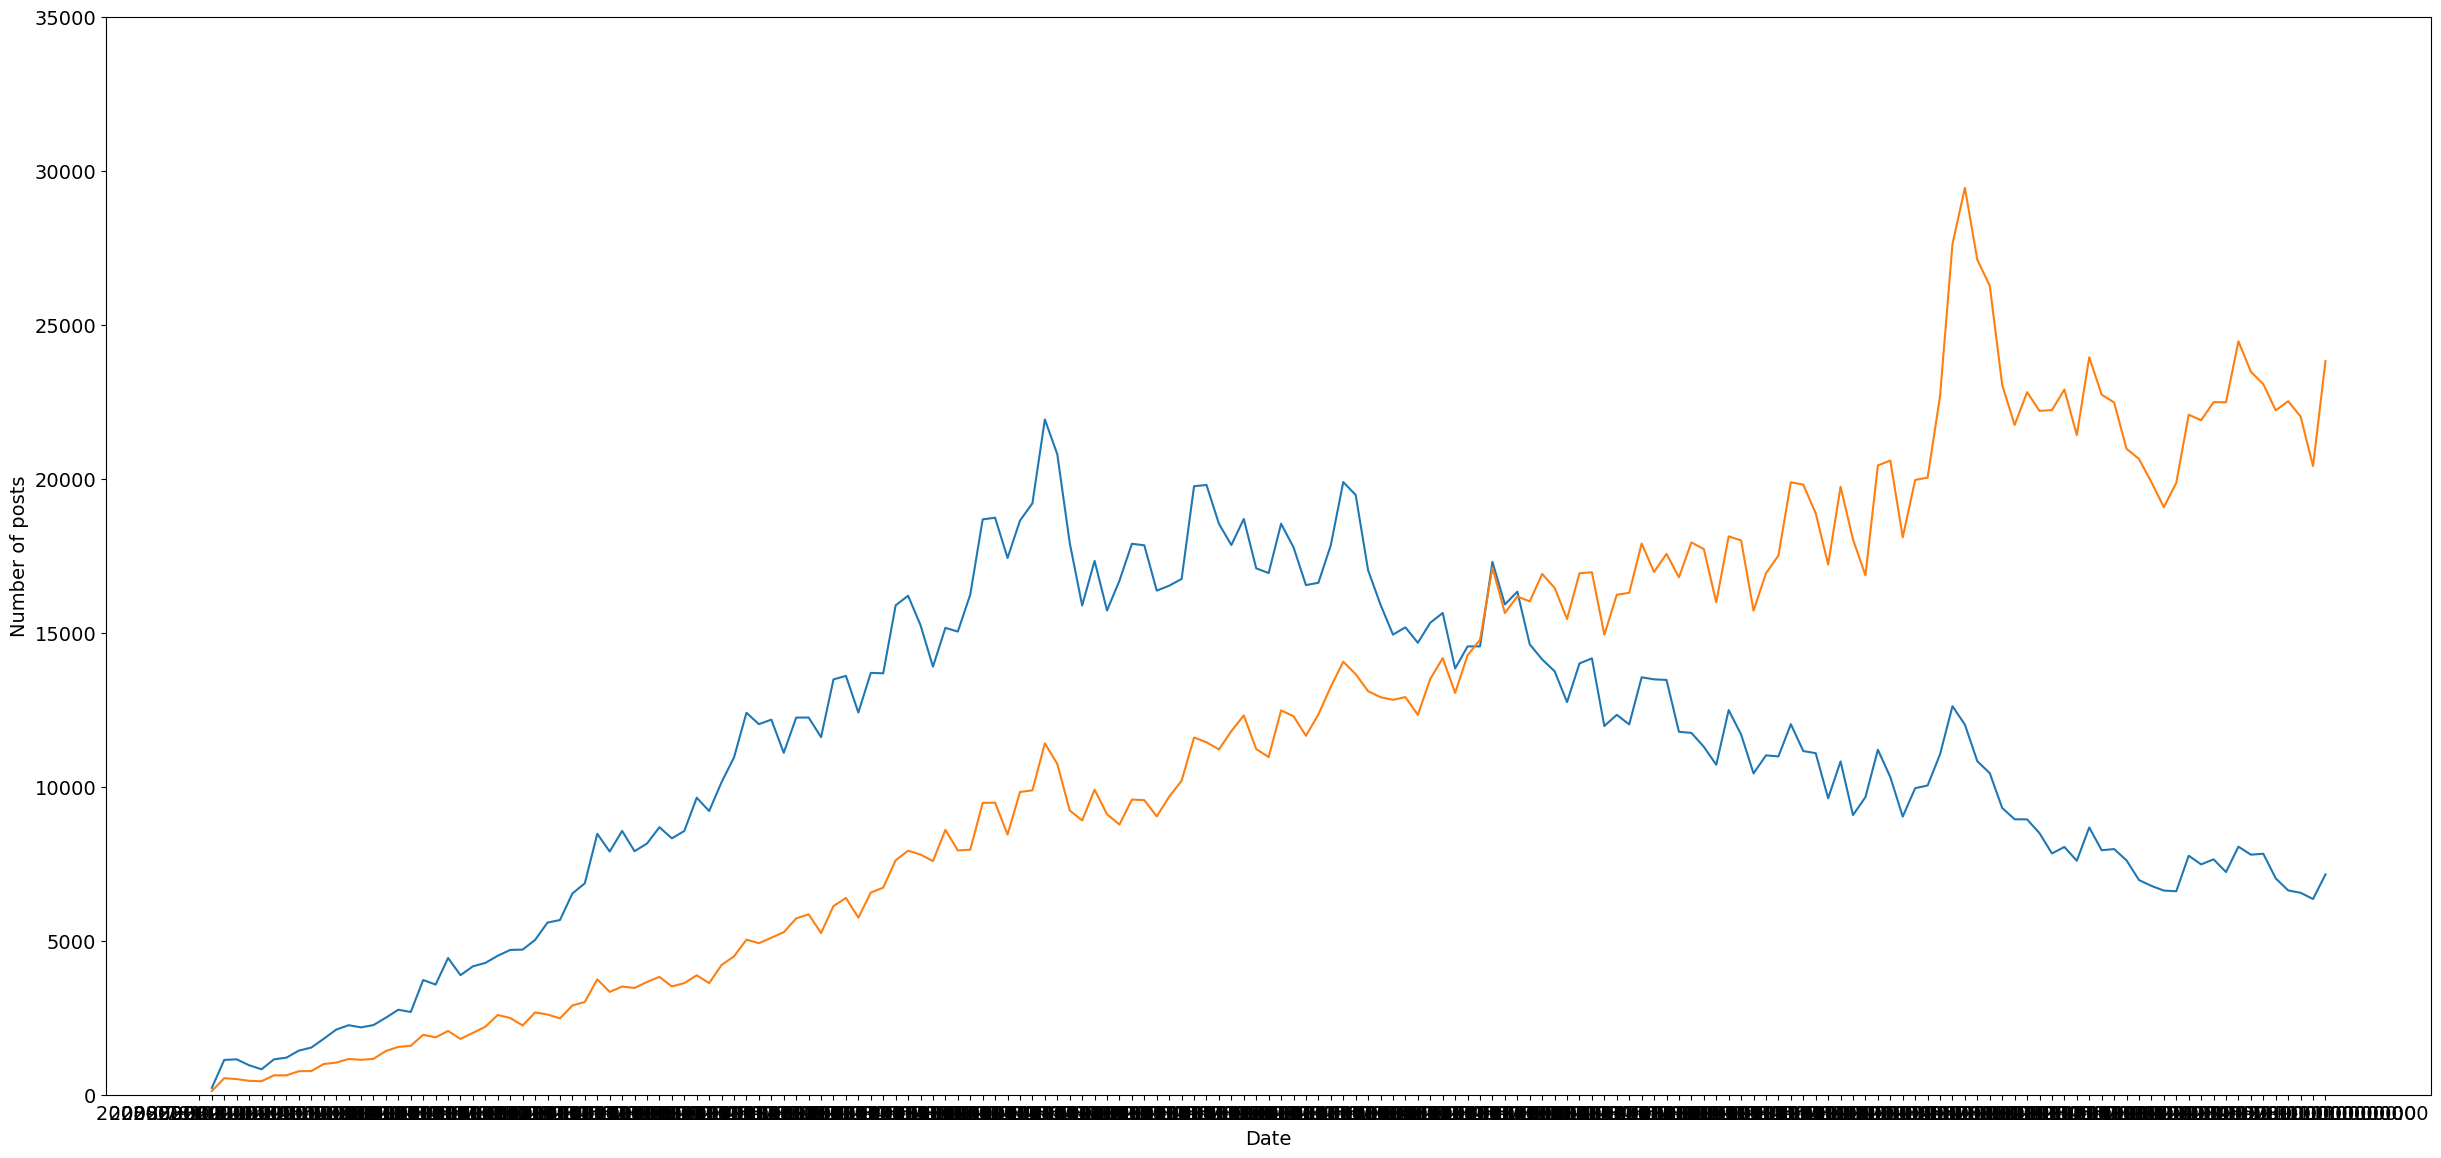

In [25]:
#The plot(x,y) visualise a line graph
plt.figure(figsize=(30,14))
#increase the font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#The axes labels are set
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
#setting limits for the axes
plt.ylim(0,35000)
#line graph for java
plt.plot(reshaped_df.index, reshaped_df.java)
#Line graph for python
plt.plot(reshaped_df.index, reshaped_df.python)

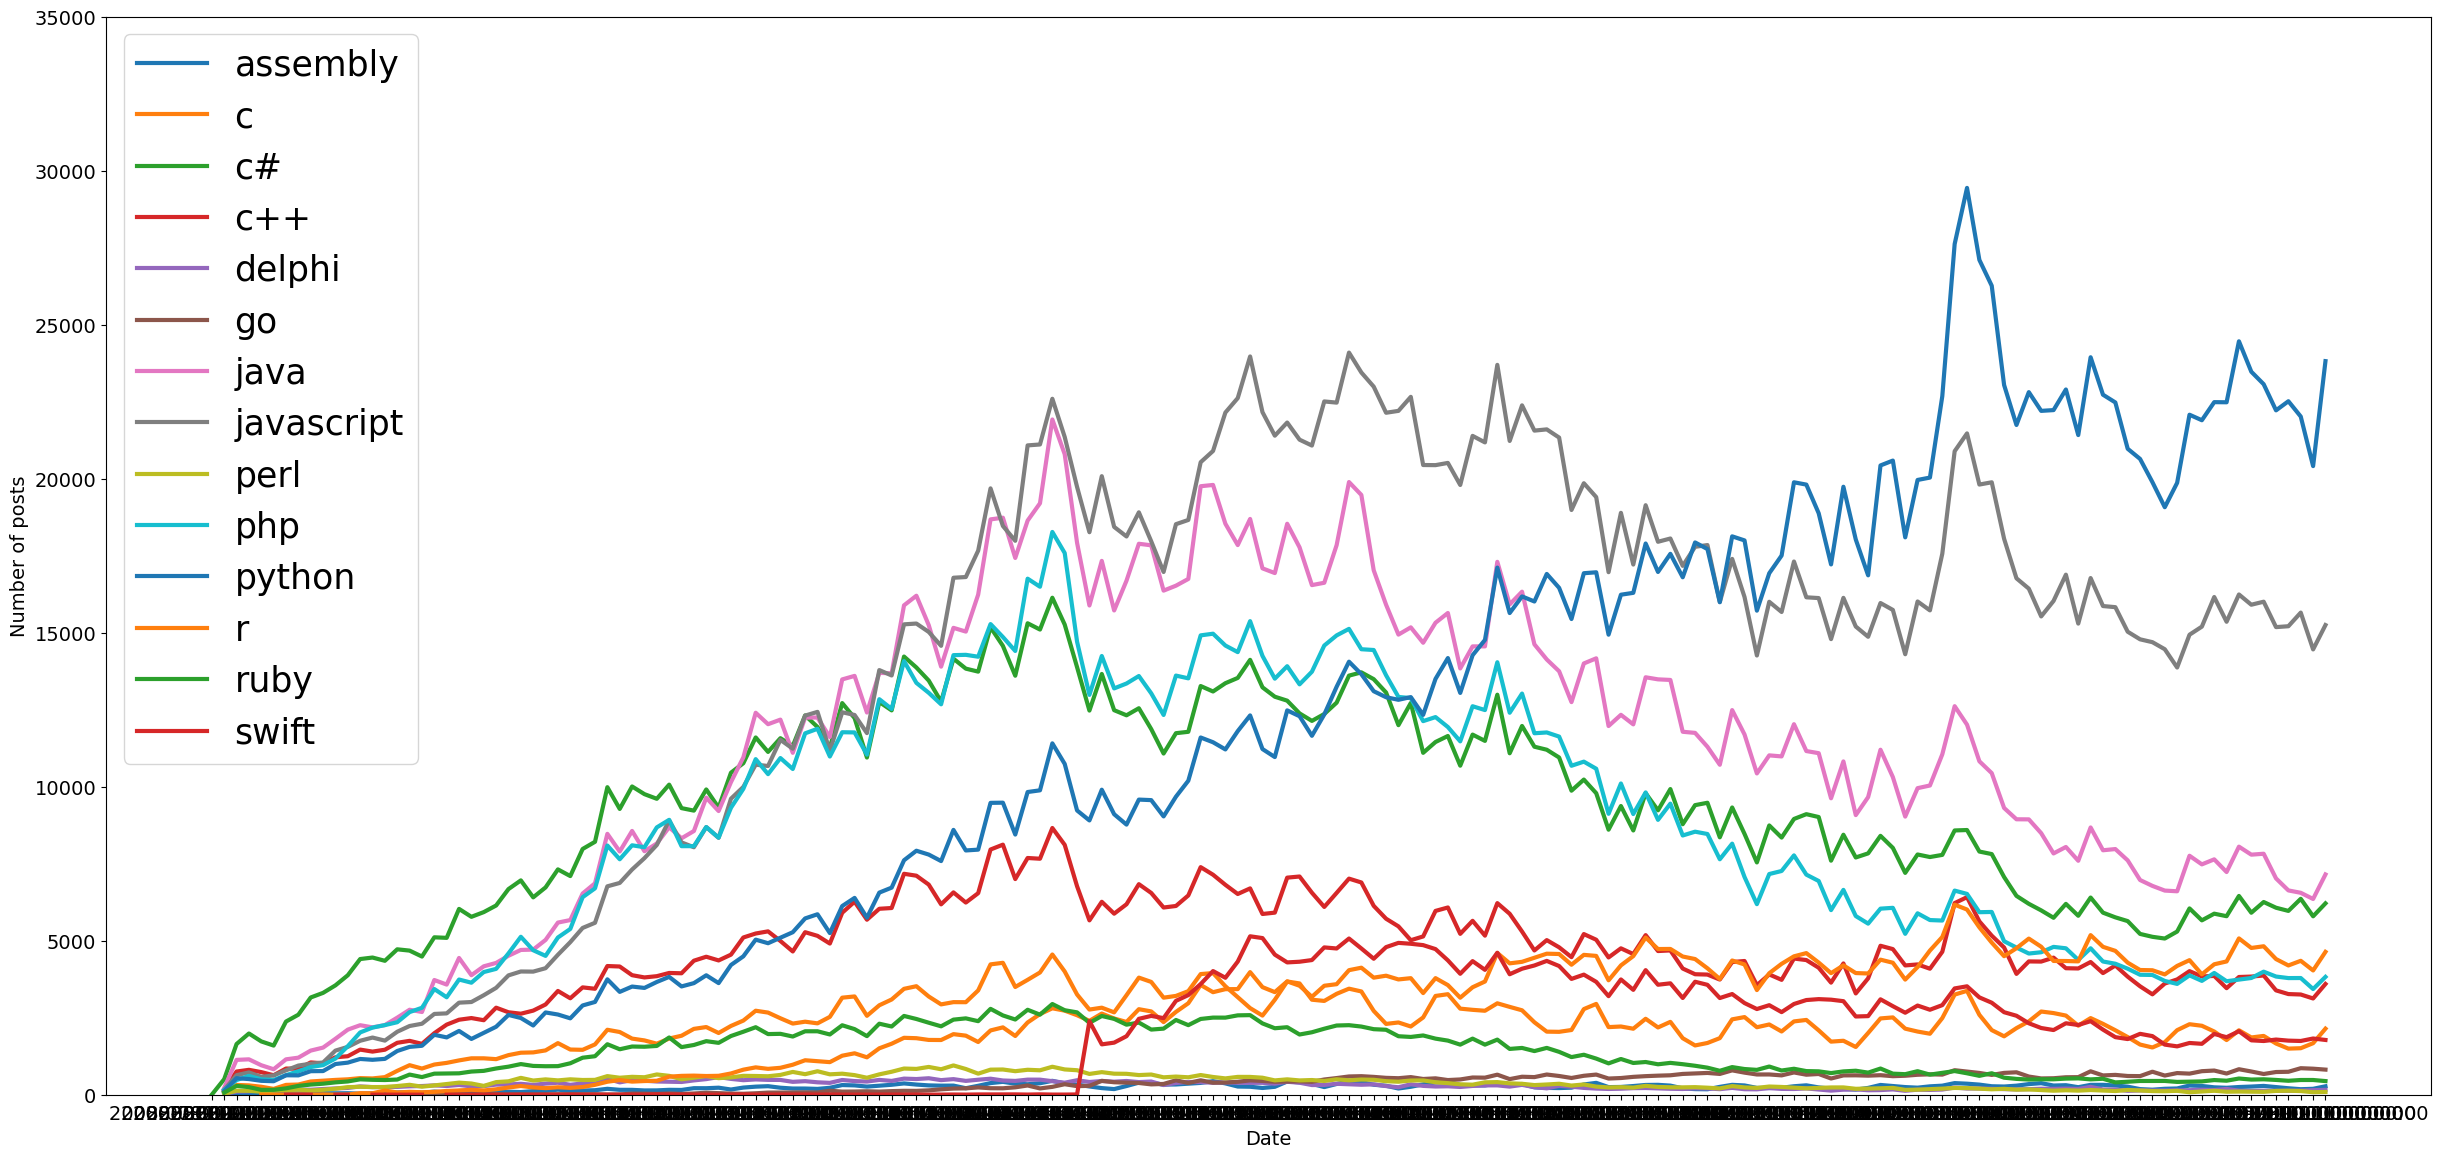

In [16]:
#Ploting all the programming languages on the same chart
#The plot(x,y) visualise a line graph
plt.figure(figsize=(30,14))
#increase the font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#The axes labels are set
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
#setting limits for the axes
plt.ylim(0,35000)

#pLOT all the programming languages
#So we use a for loop to iterate thru the different columns
# we plot as usual but we also add linewidth and names o the lines so we can know which line is which 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
            linewidth=3, label=reshaped_df[column].name)

#This places the key of the lines
plt.legend(fontsize=25)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

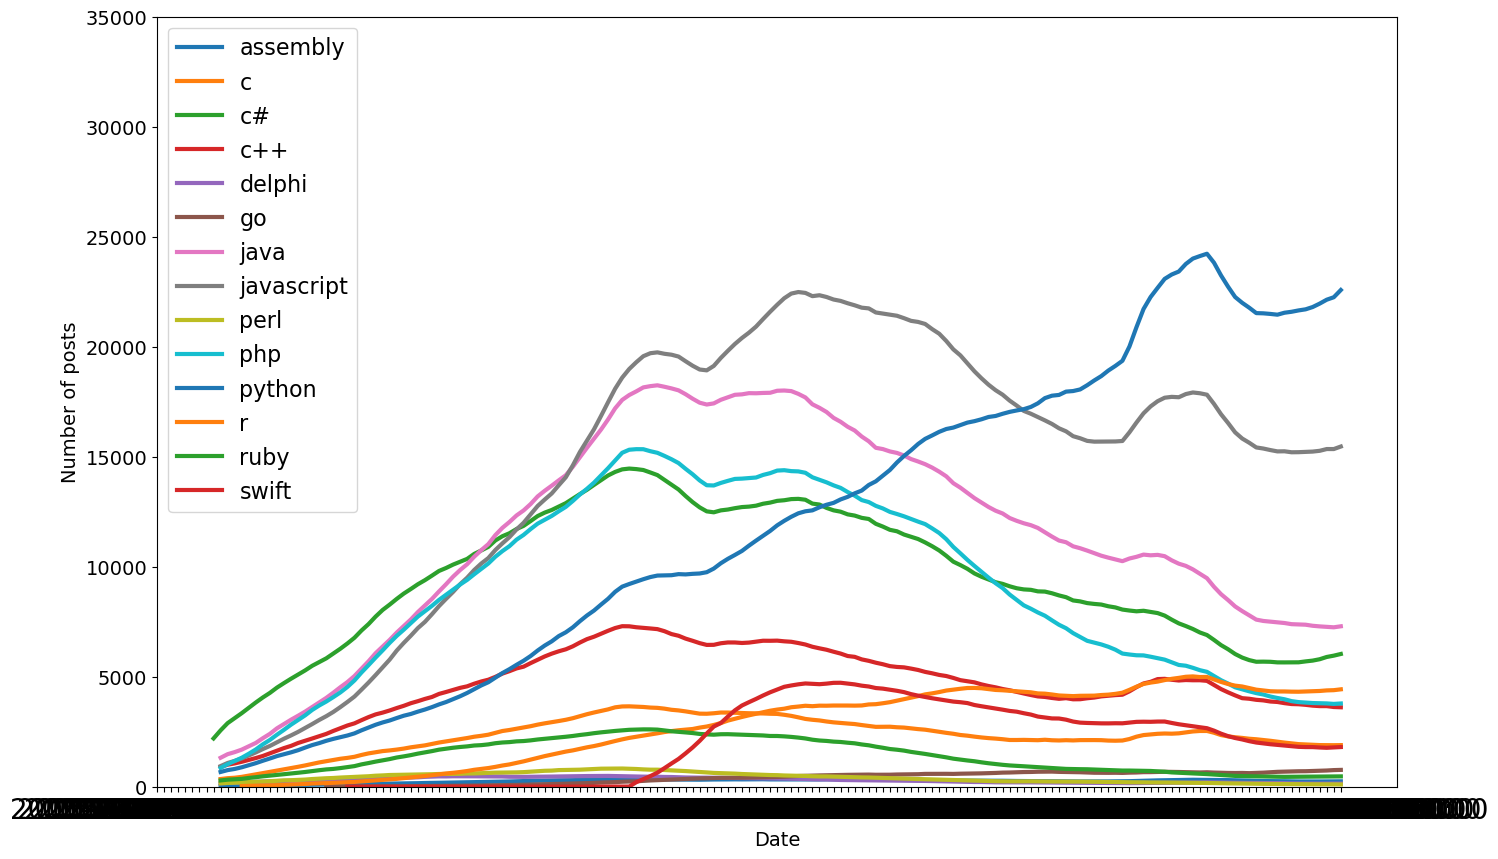

In [41]:
#tHE window is number of obeservations that are averages
roll_df = reshaped_df.rolling(window=12).mean()
#NOTE you can play with the window argument so that the lines are simpler to read or tell the story

#Design the graph
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

#plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)